# **CUDA Programming Project**

# **Installing CUDA to Remote Host**

In [39]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [40]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-eg0kkj67
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-eg0kkj67
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit aac710a35f52bb78ab34d2e52517237941399eff
  Preparing metadata (setup.py) ... done


In [41]:
%load_ext nvcc_plugin

The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


#Setup

In [42]:
from numba import cuda
# import cupy as cp
import numpy as np
import math
import imageio
import matplotlib.pyplot as plt
import time
import pandas as pd

#CPU
def cpu_encryption(an_array):
  key = (50,100)
  n = len(key)
  for x in range(an_array.shape[0]):
    for y in range(an_array.shape[1]):
      for z in range(an_array.shape[2]):
        an_array[x, y, z] = (an_array[x, y, z] + key[((x+1)*(y+1))%n]) % 256

def cpu_dencryption(an_array):
  key = (50,100)
  n = len(key)
  for x in range(an_array.shape[0]):
    for y in range(an_array.shape[1]):
      for z in range(an_array.shape[2]):
        an_array[x, y, z] = (an_array[x, y, z] - key[((x+1)*(y+1))%n] + 256) % 256

#GPU (CUDA)
@cuda.jit
def gpu_encryption(an_array):
  key = (50,100)
  n = len(key)
  x, y, z = cuda.grid(3)
  if x < an_array.shape[0] and y < an_array.shape[1] and z < an_array.shape[2]:
    an_array[x, y, z] = (an_array[x, y, z] + key[((x+1)*(y+1))%n]) % 256

@cuda.jit
def gpu_dencryption(an_array):
  key = (50,100)
  n = len(key)
  x, y, z = cuda.grid(3)
  if x < an_array.shape[0] and y < an_array.shape[1] and z < an_array.shape[2]:
    an_array[x, y, z] = (an_array[x, y, z] - key[((x+1)*(y+1))%n] + 256) % 256

#CPU

##Setup

In [43]:
cpu_enc_runtime = []
cpu_denc_runtime = []

##256

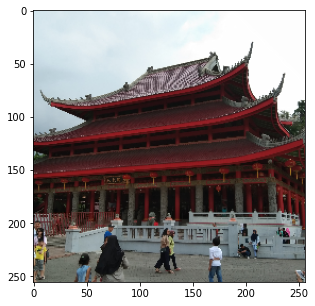

CPU time : 0.7908763885498047


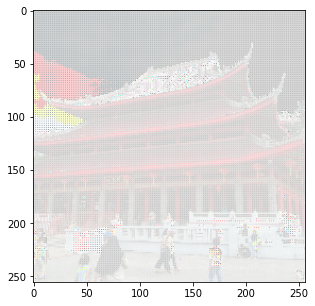

CPU time : 1.6382229328155518


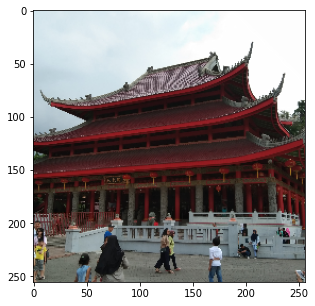

In [44]:
img = imageio.imread('256.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
cpu_encryption(img)
berhenti = time.time()

img = np.copy(img)

print("CPU time :", berhenti - mulai)
cpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
cpu_dencryption(img)
berhenti = time.time()

img = np.copy(img)

print("CPU time :", berhenti - mulai)
cpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

##512

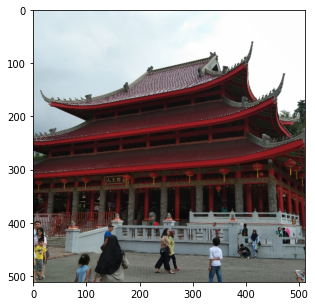

CPU time : 3.249444007873535


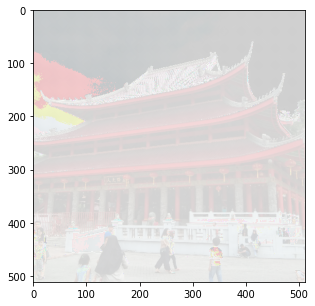

CPU time : 3.3716492652893066


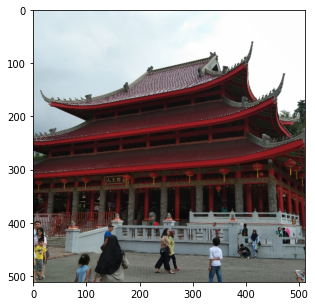

In [45]:
img = imageio.imread('512.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
cpu_encryption(img)
berhenti = time.time()

img = np.copy(img)

print("CPU time :", berhenti - mulai)
cpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
cpu_dencryption(img)
berhenti = time.time()

img = np.copy(img)

print("CPU time :", berhenti - mulai)
cpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

##1024

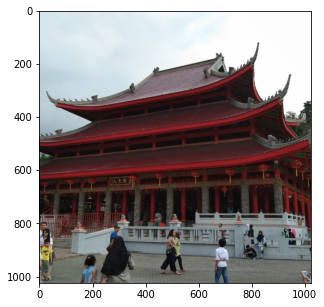

CPU time : 18.79183030128479


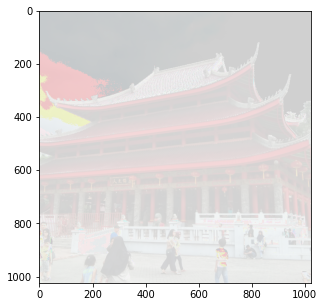

CPU time : 15.966381311416626


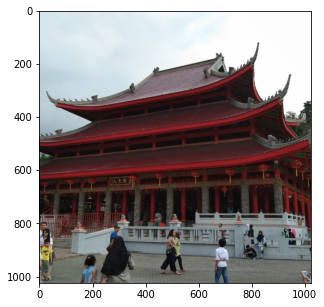

In [46]:
img = imageio.imread('1024.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
cpu_encryption(img)
berhenti = time.time()

img = np.copy(img)

print("CPU time :", berhenti - mulai)
cpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
cpu_dencryption(img)
berhenti = time.time()

img = np.copy(img)

print("CPU time :", berhenti - mulai)
cpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

##2048

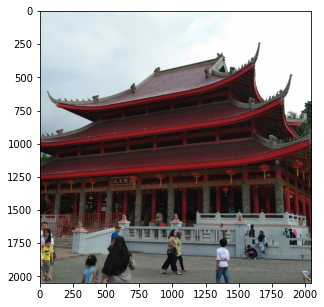

CPU time : 53.49933624267578


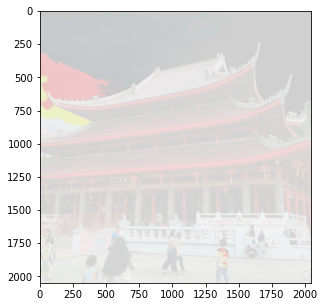

CPU time : 55.55507183074951


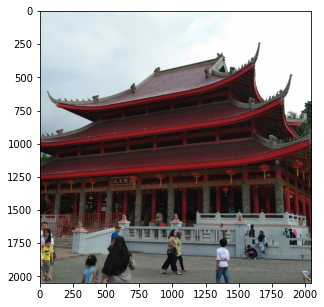

In [47]:
img = imageio.imread('2048.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
cpu_encryption(img)
berhenti = time.time()

img = np.copy(img)

print("CPU time :", berhenti - mulai)
cpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
cpu_dencryption(img)
berhenti = time.time()

img = np.copy(img)

print("CPU time :", berhenti - mulai)
cpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

In [48]:
print(cpu_enc_runtime)
print(cpu_denc_runtime)

[0.7908763885498047, 3.249444007873535, 18.79183030128479, 53.49933624267578]
[1.6382229328155518, 3.3716492652893066, 15.966381311416626, 55.55507183074951]


# GPU

##Setup

In [49]:
gpu_enc_runtime = []
gpu_denc_runtime = []

In [50]:
threadsperblock = (16, 16, 1)
blockspergrid_x = math.ceil(img.shape[0] / threadsperblock[0])
blockspergrid_y = math.ceil(img.shape[1] / threadsperblock[1])
blockspergrid_z = math.ceil(img.shape[2] / threadsperblock[2])
blockspergrid = (blockspergrid_x, blockspergrid_y, blockspergrid_z)

##128--Dummy Initiation

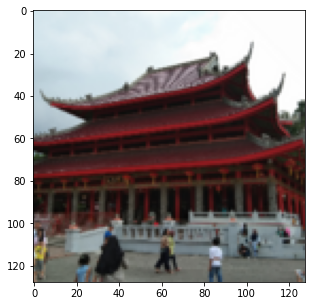

/usr/local/lib/python3.9/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


GPU time : 0.1233510971069336


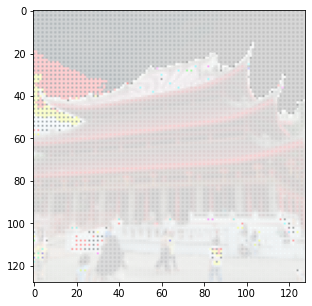

/usr/local/lib/python3.9/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


GPU time : 0.13428378105163574


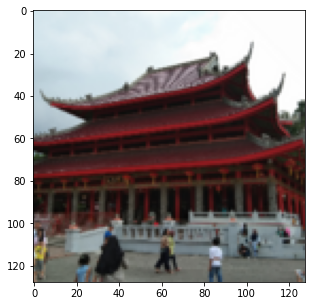

In [51]:
img = imageio.imread('128.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_encryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
# gpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_dencryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
# gpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

##256

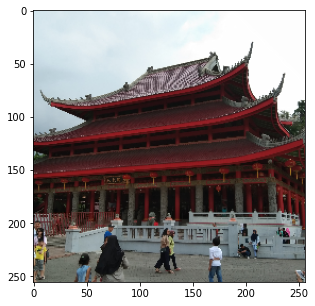

GPU time : 0.0018463134765625


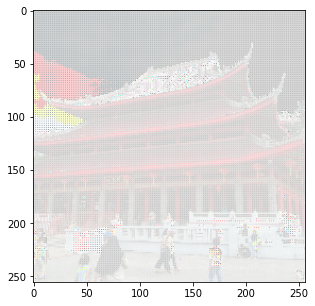

GPU time : 0.0023529529571533203


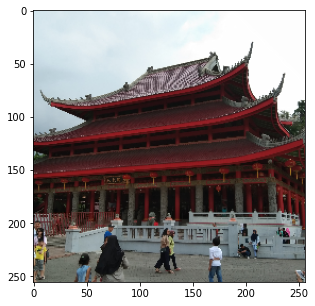

In [52]:
img = imageio.imread('256.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_encryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
gpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_dencryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
gpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

##512

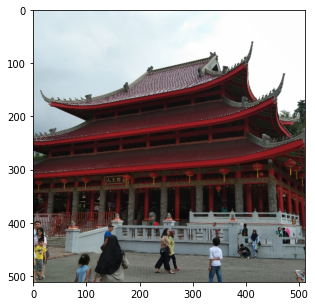

GPU time : 0.002312183380126953


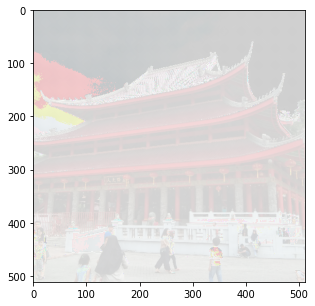

GPU time : 0.002508878707885742


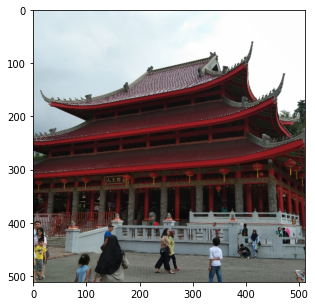

In [53]:
img = imageio.imread('512.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_encryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
gpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_dencryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
gpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

##1024

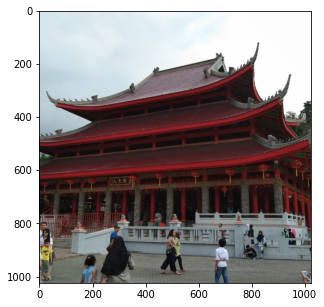

GPU time : 0.004419565200805664


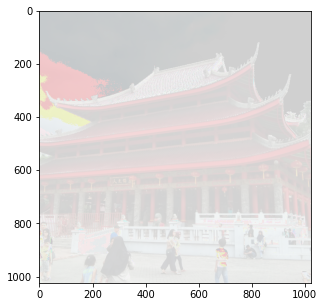

GPU time : 0.004180192947387695


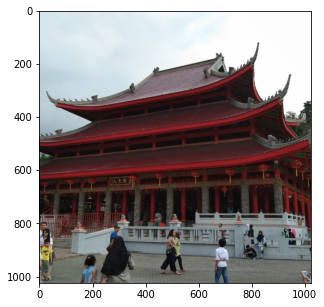

In [54]:
img = imageio.imread('1024.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_encryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
gpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_dencryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
gpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

##2048

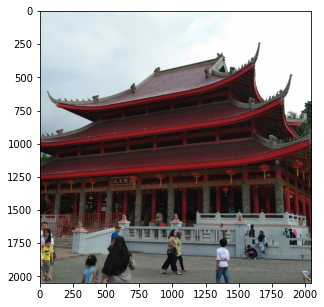

GPU time : 0.013016462326049805


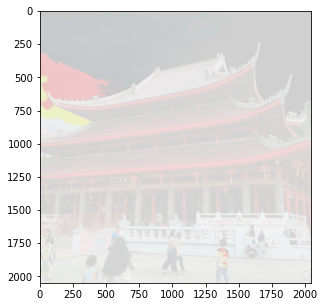

GPU time : 0.012137889862060547


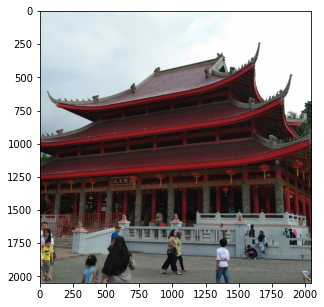

In [55]:
img = imageio.imread('2048.png')

plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_encryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
gpu_enc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

mulai = time.time()
gpu_dencryption[blockspergrid, threadsperblock](img)
berhenti = time.time()

img = np.copy(img)

print("GPU time :", berhenti - mulai)
gpu_denc_runtime.append(berhenti - mulai)
plt.figure( figsize = (5,5))
plt.imshow(img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

In [56]:
print(gpu_enc_runtime)
print(gpu_denc_runtime)

[0.0018463134765625, 0.002312183380126953, 0.004419565200805664, 0.013016462326049805]
[0.0023529529571533203, 0.002508878707885742, 0.004180192947387695, 0.012137889862060547]


#RESULT

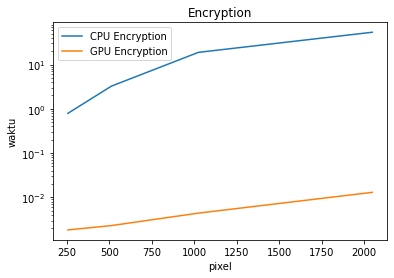

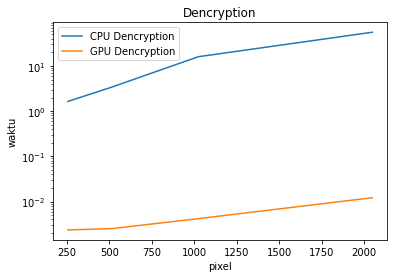

In [57]:
x_axis = [256, 512, 1024, 2048]
plt.title('Encryption')
plt.plot(x_axis, cpu_enc_runtime,  label = "CPU Encryption")
plt.plot(x_axis, gpu_enc_runtime,  label = "GPU Encryption")
plt.xlabel('pixel')
plt.ylabel('waktu')
plt.legend()
plt.yscale('log')
plt.show()

x_axis = [256, 512, 1024, 2048]
plt.title('Dencryption')
plt.plot(x_axis, cpu_denc_runtime, label = "CPU Dencryption")
plt.plot(x_axis, gpu_denc_runtime, label = "GPU Dencryption")
plt.xlabel('pixel')
plt.ylabel('waktu')
plt.legend()
plt.yscale('log')
plt.show()